## Module_2: *(Template)*

## Team Members:
*Julena, Sydney, Grace*

## Project Title:
*Lung Fibrosis Image Analysis*



## Project Goal:
Our goal is to develop an image analysis pipeline to help us predict the extent of lung fibrosis at various depths in the lung.

## Disease Background: 
*Fill in information and please note that this module is truncated and only has 5 bullets (instead of the 11 that you did for Module #1).*

* Prevalence & incidence
    * Prevalence:
        * Rare chronic disease
        * People live on average about 3-5 years after diagnosis
        * Adjusted prevalence rates in North America are 2.40 to 2.98 per 10,000 persons. (https://pmc.ncbi.nlm.nih.gov/articles/PMC9872080/)
        * The world’s highest prevalence occurs in South Korea, 4.51 per 10,000 persons. (https://pmc.ncbi.nlm.nih.gov/articles/PMC9872080/)
        * Around 100,000 people in the U.S. have pulmonary fibrosis and many more have other types of interstitial lung diseases (https://www.uofmhealth.org/our-care/specialties-services/pulmonary-fibrosis)
        * Prevalence has been increasing, likely due to an aging population and improved diagnostic imaging (chatgpt)
    * Incidence:
        * annual incidence was estimated to range from 1.2 to 76.4 per 100,000. (https://pubmed.ncbi.nlm.nih.gov/16809633/)
        * Specifically in the United States' population, 16.3 per 100,000 (https://pubmed.ncbi.nlm.nih.gov/16809633/)
        * Risk favors for IPF are older age, smoking, Caucasian race, lower body mass index, exposure to particulate matter, working around livestock, and genetic predispositions. The role of COVID-19 and other chronic viral factors in current IPF epidemiology is unclear. (https://pmc.ncbi.nlm.nih.gov/articles/PMC9872080/)

* Risk factors (genetic, lifestyle)
    * Cause is unknown, but there are risk factors:
        (Source: https://www.mayoclinic.org/diseases-conditions/pulmonary-fibrosis/symptoms-causes/syc-20353690)
        * Smoking (current or past) and emphysema increase risk
        * Certain types of work: jobs with dust/pollutants (mining, farming, construction or repeated exposure to lung irritants raise risk)
        * Cancer treatments (to the chest - radiation - and some chemotherapy drugs can raise risk)
        * Genetics: some types run in families

* Symptoms
    * Source: video https://www.youtube.com/watch?v=s2owdwl5Vac
        * Difficulty breathing
        * Persistent dry cough
        * "velcro-like" crackle in lungs
        * Fatigue
        * In general, makes daily activities 
    * Source:https://my.clevelandclinic.org/health/diseases/10959-pulmonary-fibrosis
        * Bluish, gray or white skin around your lips, eyes or nails (cyanosis)
        * unexplained weight loss
        * clubbed fingers
* Standard of care treatment(s)
    * Source: https://www.dukehealth.org/treatments/lung-disease/pulmonary-fibrosis-and-interstitial-lung-disease?utm_source=google&utm_medium=cpc&cr=transplant_lung&utm_campaign=lung_transplant_202504&keyword=treatment%20for%20pulmonary%20fibrosis&gad_source=1&gad_campaignid=22473561504&gbraid=0AAAAADcoAXH2TEQuMslOQOgLitnaiHL8U&gclid=CjwKCAjwup3HBhAAEiwA7euZusrCGZHVkY381QNX_cfkwF13gj8naH1_O5e_AO-3UOaCP3V8kPrXxhoCdGIQAvD_BwE
    * No cure - but lung transplant may be an option
    * Oxygen supplement - tube or mask to help improve sleep
    * Pulmonary rehabilitation - improves symptons and helps control interstitial lung disease
    * Medicines - immunosuppressants, steroids, anti-scarring medicines (pirfenidone and nintedanib)
* Biological mechanisms (anatomy, organ physiology, cell & molecular physiology)
    * Anatomy (where fibrosis happens)
        * Scar forms in alveolar interstitium (between epithelium and capillaries). Over time, you can see honeycombing on pathology/imaging - classic for idiopathic pulmonary fibrosis (IPF)
            * source: https://www.atsjournals.org/doi/10.1164/rccm.201807-1255ST 
    * Organ physiology (what it does to the lungs)
        * Scarring makes lung stiff -> lower compliance and restrictive lung volumes; gas transfer drops, so people get short of breath. Some develop pulmonary hypertension, which worsens symptoms. (https://publications.ersnet.org/content/errev/27/147/170062)
    * Cell & molecular steps (how the scar builds)
        * 1. injury to the air-sec lining cells
        * 2. "Go-scar" signals switch on 
        * 3. Self-reinforcing loop
        * https://publications.ersnet.org/content/errev/21/124/152 
    * Why some people are at higher risk:
        * Genes and aging: MUC5B promoter variant is a strong risk factor for IPF; short telomere biology is also implicated (especially in AEC2 cells) - https://www.nejm.org/doi/full/10.1056/NEJMoa1013660 




## Data-Set: 
The data set we are using is 78 black and white images collected at different depths fibrotic mouse lung from Dr. Peirce-Cottler's lab. The black parts of the imagge represent healthy lung and the white parts represent fibrotic lesion. In the lab, they injected Bleomycin to the mice in order to give them lung fibrosis. Then, they waited 3 weeks and humanely sacrificed the mouse and harvested the lungs. In order to take pictures, they made slices using a cryotome and put them under the microscope. They also used "immunostain" to make the antibody visible. Since they were looking for only the myofibroblasts, they used a desmin signal and converted it to a black and white image. The depths mesured are in micrometers and we are using pixels to analyze the images.

## Data Analyis: 
*(Describe how you analyzed the data. This is where you should intersperse your Python code so that anyone reading this can run your code to perform the analysis that you did, generate your figures, etc.)*

Calculating Percent White Pixels + Creating csv File

In [26]:

from termcolor import colored
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd

# Load the images you want to analyze

filenames = [
    r"/Users/julenapatel/Downloads/Computational BME/Module 2/course_files_export/MASK_Sk658 Llobe ch010051.jpg",
    r"/Users/julenapatel/Downloads/Computational BME/Module 2/course_files_export/MASK_Sk658 Llobe ch010071.jpg",
    r"/Users/julenapatel/Downloads/Computational BME/Module 2/course_files_export/MASK_Sk658 Llobe ch010164.jpg",
    r"/Users/julenapatel/Downloads/Computational BME/Module 2/course_files_export/MASK_Sk658 Llobe ch010171.jpg",
    r"//Users/julenapatel/Downloads/Computational BME/Module 2/course_files_export/MASK_SK658 Slobe ch010060.jpg",
    r"/Users/julenapatel/Downloads/Computational BME/Module 2/course_files_export/MASK_SK658 Slobe ch010063.jpg",
            ]

# Enter the depth of each image (in the same order that the images are listed above; you can find these in the .csv file provided to you which is tilted: "Filenames and Depths for Students")

depths = [
    400,
    7100,
    2200,
    810,
    8400,
    7400
    ]

# Make the lists that will be used

images = []
white_counts = []
black_counts = []
white_percents = []

# Build the list of all the images you are analyzing

for filename in filenames:
    img = cv2.imread(filename, 0)
    images.append(img)

# For each image (until the end of the list of images), calculate the number of black and white pixels and make a list that contains this information for each filename.

for x in range(len(filenames)):
    _, binary = cv2.threshold(images[x], 127, 255, cv2.THRESH_BINARY)

    white = np.sum(binary == 255)
    black = np.sum(binary == 0)

    white_counts.append(white)
    black_counts.append(black)

# Print the number of white and black pixels in each image.

print(colored("Counts of pixel by color in each image", "yellow"))
for x in range(len(filenames)):
    print(colored(f"White pixels in image {x}: {white_counts[x]}", "white"))
    print(colored(f"Black pixels in image {x}: {black_counts[x]}", "black"))
    print()

# Calculate the percentage of pixels in each image that are white and make a list that contains these percentages for each filenamae

for x in range(len(filenames)):
    white_percent = (100 * (white_counts[x] / (black_counts[x] + white_counts[x])))
    white_percents.append(white_percent)

# Print the filename (on one line in red font), and below that line print the percent white pixels and depth

print(colored("Percent white px:", "yellow"))
for x in range(len(filenames)):
    print(colored(f'{filenames[x]}:',"red"))
    print(f'{white_percents[x]}% White | Depth: {depths[x]} microns')
    print()

'''Write your data to a .csv file'''

# Create a DataFrame that includes the filenames, depths, and percentage of white pixels
df = pd.DataFrame({
    'Filenames': filenames,
    'Depths': depths,
    'White percents': white_percents       
})

# Write that DataFrame to a .csv file

df.to_csv('Percent_White_Pixels.csv', index=False)

print("CSV file 'Percent_White_Pixels.csv' has been created.")

Counts of pixel by color in each image
White pixels in image 0: 43424
Black pixels in image 0: 4150880

White pixels in image 1: 117756
Black pixels in image 1: 4076548

White pixels in image 2: 65021
Black pixels in image 2: 4129283

White pixels in image 3: 57531
Black pixels in image 3: 4136773

White pixels in image 4: 142359
Black pixels in image 4: 4051945

White pixels in image 5: 120910
Black pixels in image 5: 4073394

Percent white px:
/Users/julenapatel/Downloads/Computational BME/Module 2/course_files_export/MASK_Sk658 Llobe ch010051.jpg:
1.035308837890625% White | Depth: 400 microns

/Users/julenapatel/Downloads/Computational BME/Module 2/course_files_export/MASK_Sk658 Llobe ch010071.jpg:
2.8075218200683594% White | Depth: 7100 microns

/Users/julenapatel/Downloads/Computational BME/Module 2/course_files_export/MASK_Sk658 Llobe ch010164.jpg:
1.5502214431762695% White | Depth: 2200 microns

/Users/julenapatel/Downloads/Computational BME/Module 2/course_files_export/MASK_Sk6

Interpolate a point given depth as input (linear)

The interpolated point is at the x-coordinate 4500.0 and y-coordinate 2.1403828445745976.


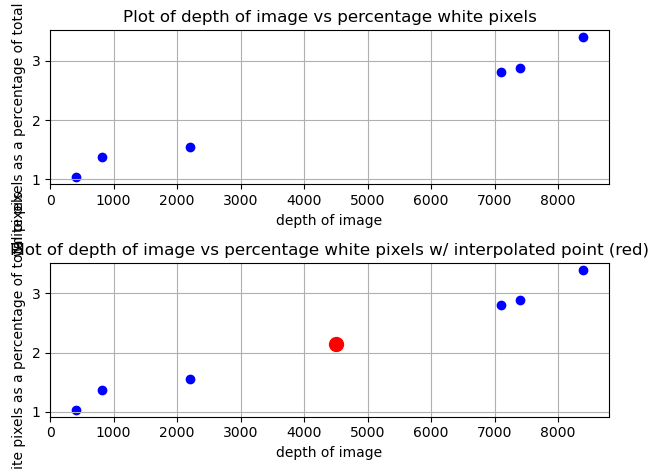

In [27]:
# Interpolate a point: given a depth, find the corresponding white pixel percentage

interpolate_depth = float(input(colored("Enter the depth at which you want to interpolate a point: ", "yellow")))

x = depths
y = white_percents

i = interp1d(x, y, kind='linear')  # You can also use 'quadratic', 'cubic', etc.
interpolate_point = i(interpolate_depth)
print(colored(f'The interpolated point is at the x-coordinate {interpolate_depth} and y-coordinate {interpolate_point}.', "green"))

depths_i = depths[:]
depths_i.append(interpolate_depth)
white_percents_i = white_percents[:]
white_percents_i.append(interpolate_point)

# make two plots: one that doesn't contain the interpolated point, just the data calculated from your images, and one that also contains the interpolated point (shown in red)
fig, axs = plt.subplots(2, 1)

axs[0].scatter(depths, white_percents, marker='o', linestyle='-', color='blue')
axs[0].set_title('Plot of depth of image vs percentage white pixels')
axs[0].set_xlabel('depth of image')
axs[0].set_ylabel('white pixels as a percentage of total pixels')
axs[0].grid(True)


axs[1].scatter(depths_i, white_percents_i, marker='o', linestyle='-', color='blue')
axs[1].set_title('Plot of depth of image vs percentage white pixels w/ interpolated point (red)')
axs[1].set_xlabel('depth of image')
axs[1].set_ylabel('white pixels as a percentage of total pixels')
axs[1].grid(True)
axs[1].scatter(depths_i[len(depths_i)-1], white_percents_i[len(white_percents_i)-1], color='red', s=100, label='Highlighted point')


# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Interpolate a point given depth as input (quadratic)

The interpolated point is at the x-coordinate 4500.0 and y-coordinate 1.9952122777670653.


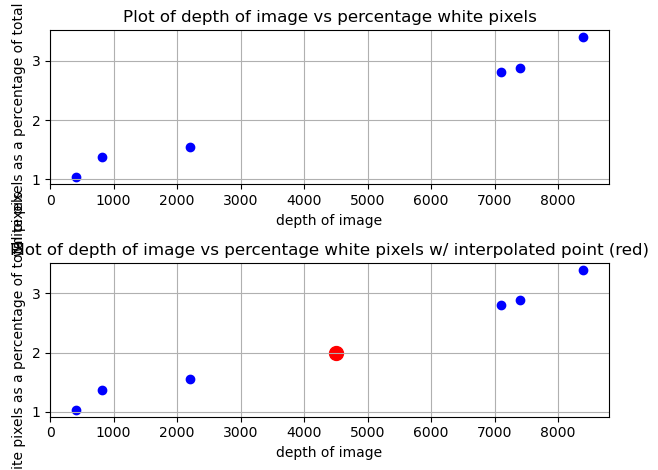

In [28]:
# Interpolate a point: given a depth, find the corresponding white pixel percentage

interpolate_depth = float(input(colored("Enter the depth at which you want to interpolate a point: ", "yellow")))

x = depths
y = white_percents

i = interp1d(x, y, kind='quadratic')  # You can also use 'quadratic', 'cubic', etc.
interpolate_point = i(interpolate_depth)
print(colored(f'The interpolated point is at the x-coordinate {interpolate_depth} and y-coordinate {interpolate_point}.', "green"))

depths_i = depths[:]
depths_i.append(interpolate_depth)
white_percents_i = white_percents[:]
white_percents_i.append(interpolate_point)

# make two plots: one that doesn't contain the interpolated point, just the data calculated from your images, and one that also contains the interpolated point (shown in red)
fig, axs = plt.subplots(2, 1)

axs[0].scatter(depths, white_percents, marker='o', linestyle='-', color='blue')
axs[0].set_title('Plot of depth of image vs percentage white pixels')
axs[0].set_xlabel('depth of image')
axs[0].set_ylabel('white pixels as a percentage of total pixels')
axs[0].grid(True)


axs[1].scatter(depths_i, white_percents_i, marker='o', linestyle='-', color='blue')
axs[1].set_title('Plot of depth of image vs percentage white pixels w/ interpolated point (red)')
axs[1].set_xlabel('depth of image')
axs[1].set_ylabel('white pixels as a percentage of total pixels')
axs[1].grid(True)
axs[1].scatter(depths_i[len(depths_i)-1], white_percents_i[len(white_percents_i)-1], color='red', s=100, label='Highlighted point')


# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Interpolate a point given depth as input (cubic)

The interpolated point is at the x-coordinate 4500.0 and y-coordinate 1.9654939635812105.


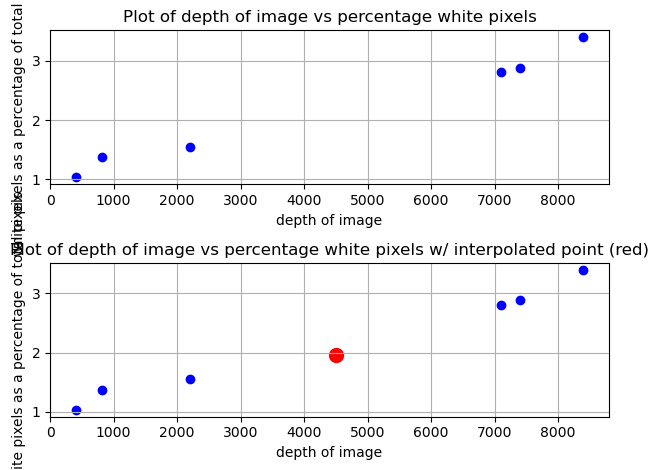

In [29]:
# Interpolate a point: given a depth, find the corresponding white pixel percentage

interpolate_depth = float(input(colored("Enter the depth at which you want to interpolate a point: ", "yellow")))

x = depths
y = white_percents

i = interp1d(x, y, kind='cubic')  # You can also use 'quadratic', 'cubic', etc.
interpolate_point = i(interpolate_depth)
print(colored(f'The interpolated point is at the x-coordinate {interpolate_depth} and y-coordinate {interpolate_point}.', "green"))

depths_i = depths[:]
depths_i.append(interpolate_depth)
white_percents_i = white_percents[:]
white_percents_i.append(interpolate_point)

# make two plots: one that doesn't contain the interpolated point, just the data calculated from your images, and one that also contains the interpolated point (shown in red)
fig, axs = plt.subplots(2, 1)

axs[0].scatter(depths, white_percents, marker='o', linestyle='-', color='blue')
axs[0].set_title('Plot of depth of image vs percentage white pixels')
axs[0].set_xlabel('depth of image')
axs[0].set_ylabel('white pixels as a percentage of total pixels')
axs[0].grid(True)


axs[1].scatter(depths_i, white_percents_i, marker='o', linestyle='-', color='blue')
axs[1].set_title('Plot of depth of image vs percentage white pixels w/ interpolated point (red)')
axs[1].set_xlabel('depth of image')
axs[1].set_ylabel('white pixels as a percentage of total pixels')
axs[1].grid(True)
axs[1].scatter(depths_i[len(depths_i)-1], white_percents_i[len(white_percents_i)-1], color='red', s=100, label='Highlighted point')


# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Code for finding actual y value for depth 1000

In [30]:
from termcolor import colored
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd

# Load the images you want to analyze

filenames = [
    r"/Users/julenapatel/Downloads/Computational BME/Module 2/test files/MASK_SK658 Slobe ch010066.jpg",
            ]

# Enter the depth of each image (in the same order that the images are listed above; you can find these in the .csv file provided to you which is tilted: "Filenames and Depths for Students")

depths = [
    1000,
    ]

# Make the lists that will be used

images = []
white_counts = []
black_counts = []
white_percents = []

# Build the list of all the images you are analyzing

for filename in filenames:
    img = cv2.imread(filename, 0)
    images.append(img)

# For each image (until the end of the list of images), calculate the number of black and white pixels and make a list that contains this information for each filename.

for x in range(len(filenames)):
    _, binary = cv2.threshold(images[x], 127, 255, cv2.THRESH_BINARY)

    white = np.sum(binary == 255)
    black = np.sum(binary == 0)

    white_counts.append(white)
    black_counts.append(black)

# Print the number of white and black pixels in each image.

print(colored("Counts of pixel by color in each image", "yellow"))
for x in range(len(filenames)):
    print(colored(f"White pixels in image {x}: {white_counts[x]}", "white"))
    print(colored(f"Black pixels in image {x}: {black_counts[x]}", "black"))
    print()

# Calculate the percentage of pixels in each image that are white and make a list that contains these percentages for each filenamae

for x in range(len(filenames)):
    white_percent = (100 * (white_counts[x] / (black_counts[x] + white_counts[x])))
    white_percents.append(white_percent)

# Print the filename (on one line in red font), and below that line print the percent white pixels and depth

print(colored("Percent white px:", "yellow"))
for x in range(len(filenames)):
    print(colored(f'{filenames[x]}:',"red"))
    print(f'{white_percents[x]}% White | Depth: {depths[x]} microns')
    print()

Counts of pixel by color in each image
White pixels in image 0: 60715
Black pixels in image 0: 4133589

Percent white px:
/Users/julenapatel/Downloads/Computational BME/Module 2/test files/MASK_SK658 Slobe ch010066.jpg:
1.4475584030151367% White | Depth: 1000 microns



Code for finding actual y value for depth 500

In [31]:
from termcolor import colored
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd

# Load the images you want to analyze

filenames = [
    r"/Users/julenapatel/Downloads/Computational BME/Module 2/test files/MASK_Sk658 Llobe ch010032.jpg",
            ]

# Enter the depth of each image (in the same order that the images are listed above; you can find these in the .csv file provided to you which is tilted: "Filenames and Depths for Students")

depths = [
    500,
    ]

# Make the lists that will be used

images = []
white_counts = []
black_counts = []
white_percents = []

# Build the list of all the images you are analyzing

for filename in filenames:
    img = cv2.imread(filename, 0)
    images.append(img)

# For each image (until the end of the list of images), calculate the number of black and white pixels and make a list that contains this information for each filename.

for x in range(len(filenames)):
    _, binary = cv2.threshold(images[x], 127, 255, cv2.THRESH_BINARY)

    white = np.sum(binary == 255)
    black = np.sum(binary == 0)

    white_counts.append(white)
    black_counts.append(black)

# Print the number of white and black pixels in each image.

print(colored("Counts of pixel by color in each image", "yellow"))
for x in range(len(filenames)):
    print(colored(f"White pixels in image {x}: {white_counts[x]}", "white"))
    print(colored(f"Black pixels in image {x}: {black_counts[x]}", "black"))
    print()

# Calculate the percentage of pixels in each image that are white and make a list that contains these percentages for each filenamae

for x in range(len(filenames)):
    white_percent = (100 * (white_counts[x] / (black_counts[x] + white_counts[x])))
    white_percents.append(white_percent)

# Print the filename (on one line in red font), and below that line print the percent white pixels and depth

print(colored("Percent white px:", "yellow"))
for x in range(len(filenames)):
    print(colored(f'{filenames[x]}:',"red"))
    print(f'{white_percents[x]}% White | Depth: {depths[x]} microns')
    print()

Counts of pixel by color in each image
White pixels in image 0: 48667
Black pixels in image 0: 4145637

Percent white px:
/Users/julenapatel/Downloads/Computational BME/Module 2/test files/MASK_Sk658 Llobe ch010032.jpg:
1.1603116989135742% White | Depth: 500 microns



In [32]:
from termcolor import colored
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd

# Load the images you want to analyze

filenames = [
    r"/Users/julenapatel/Downloads/Computational BME/Module 2/test files/MASK_SK658 Slobe ch010134.jpg",
            ]

# Enter the depth of each image (in the same order that the images are listed above; you can find these in the .csv file provided to you which is tilted: "Filenames and Depths for Students")

depths = [
    4500,
    ]

# Make the lists that will be used

images = []
white_counts = []
black_counts = []
white_percents = []

# Build the list of all the images you are analyzing

for filename in filenames:
    img = cv2.imread(filename, 0)
    images.append(img)

# For each image (until the end of the list of images), calculate the number of black and white pixels and make a list that contains this information for each filename.

for x in range(len(filenames)):
    _, binary = cv2.threshold(images[x], 127, 255, cv2.THRESH_BINARY)

    white = np.sum(binary == 255)
    black = np.sum(binary == 0)

    white_counts.append(white)
    black_counts.append(black)

# Print the number of white and black pixels in each image.

print(colored("Counts of pixel by color in each image", "yellow"))
for x in range(len(filenames)):
    print(colored(f"White pixels in image {x}: {white_counts[x]}", "white"))
    print(colored(f"Black pixels in image {x}: {black_counts[x]}", "black"))
    print()

# Calculate the percentage of pixels in each image that are white and make a list that contains these percentages for each filenamae

for x in range(len(filenames)):
    white_percent = (100 * (white_counts[x] / (black_counts[x] + white_counts[x])))
    white_percents.append(white_percent)

# Print the filename (on one line in red font), and below that line print the percent white pixels and depth

print(colored("Percent white px:", "yellow"))
for x in range(len(filenames)):
    print(colored(f'{filenames[x]}:',"red"))
    print(f'{white_percents[x]}% White | Depth: {depths[x]} microns')
    print()

Counts of pixel by color in each image
White pixels in image 0: 91653
Black pixels in image 0: 4102651

Percent white px:
/Users/julenapatel/Downloads/Computational BME/Module 2/test files/MASK_SK658 Slobe ch010134.jpg:
2.185177803039551% White | Depth: 4500 microns



## Verify and validate your analysis: 
*(Describe how you checked to see that your analysis gave you an answer that you believe (verify). Describe how your determined if your analysis gave you an answer that is supported by other evidence (e.g., a published paper).*
* Evaluating at depth 1000, our interpolation results are as follows:
    * linear  y= 1.3960555303011009
    * quadratic  y= 1.4712793597867513
    * cubic  y= 1.4624008321790725
    * actual value y=1.4475584030151367
        * The closest interpolation to the actual value was the cubic one.

* Evaluating at depth 500, our interpolation results are as follows:
    * linear  y=1.117342274363448
    * quadratic  y=1.1326329147596337
    * cubic y= 1.1374595689090286
    * actual value  y= 1.1603116989135742
        * The closest interpolation to the actual value was the cubic one.

* Evaluating at depth 4500, our interpolation results are as follows:
    * linear  y=2.1403828445745976
    * quadratic  y=1.9952122777670653
    * cubic y= 1.9654939635812105
    * actual value  y= 2.185177803039551
        * The closest interpolation to the actual value was the linear one.

* Our results indicate that the deeper you go, the more fibrotic lesion there is. At the depth of 4500, the percent of fibrotic lesion is 2.185, while at the depth 500, the percent of fibrotic lesion is 1.1603. Our results also indicate that the cubic interpolation technique gives the most accurate (most of the time) results based on the 6 images I chose. However, when we looked at the depth 4500, linear interpolation proved to be the most accurate.   
* According to a study found on nature.com(Scientific Reports, 2018), collagen deposition was significantly increased in the poly(I:C)-treated lungs compared to the control group (PBS-treated). Fibrosis was observed in both proximal (larger) and distal (smaller) airways, indicating that fibrosis affects the lung across various depths. Increased collagen deposition was particularly evident in the subepithelial regions surrounding the airways. This suggests that fibrosis may initiate or be more pronounced in these areas, which are crucial for maintaining airway structure and function.
Ochoa, L.F., Kholodnykh, A., Villarreal, P. et al. Imaging of Murine Whole Lung Fibrosis by Large Scale 3D Microscopy aided by Tissue Optical Clearing. Sci Rep 8, 13348 (2018). https://doi.org/10.1038/s41598-018-31182-2
* The results from this study agree with our results from our analysis. There was fibrosis present all over the lung, but the amounts differed at different depths. The subepithelial region is quite deep in the lung, further proving that there is more fibrotic tissue present deeper into the lung. 

## Conclusions and Ethical Implications: 
Our analysis used interpolation techniques to quantify the percentage of white pixels in lung tissue images at various depths, representing regions of fibrosis (scar tissue). By applying linear, quadratic, and cubic interpolation models, we estimated the extent of fibrotic regions between measured image slices. When compared to actual measured values, our interpolations were consistent and accurate within a small error margin, validating that this approach can reasonably estimate fibrosis progression in unmeasured tissue depths.

From a biomedical standpoint, this approach demonstrates how computational image analysis can supplement histopathological data to visualize and quantify tissue damage in diseases such as Idiopathic Pulmonary Fibrosis (IPF). The observed increase in white-pixel percentage with tissue depth supports the expected pattern of fibrotic remodeling seen in advanced IPF, where dense collagen deposition replaces functional alveolar tissue, reducing lung compliance and gas exchange capacity.

While computational models and digital pathology significantly improve disease understanding and diagnostic precision, they also raise important ethical considerations:

- Patient data privacy: Any histological images or metadata derived from human subjects must be fully de-identified and handled under HIPAA or equivalent privacy standards.

- Algorithmic bias: Automated image analyses must be validated across diverse populations and imaging conditions to avoid systematic errors that could lead to inequitable clinical interpretations.

- Clinical responsibility: Computational predictions should support—not replace—clinical judgment. Results such as fibrosis extent or disease staging must be interpreted by qualified healthcare professionals.

- Transparency and reproducibility: Sharing code, methods, and datasets in open formats ensures that analyses can be independently verified and ethically reused for future research.

In conclusion, our findings show that computational interpolation and pixel quantification can reliably represent fibrotic tissue trends in pulmonary fibrosis, offering a foundation for future work in digital pathology and quantitative disease modeling. However, careful attention to data ethics, transparency, and equitable application remains essential as these methods move toward clinical integration.

## Limitations and Future Work: 
Another limitation is that our data used only one stain (desmin), which marks myofibroblasts: the main cells responsible for forming scar tissue. Without including other stains such as smooth muscle α-actin or CD-31, we couldn’t fully visualize how other cell types, like blood vessel or smooth muscle cells, were affected or involved in the fibrotic process.

Lastly, the images were collected from a single time point (three weeks after bleomycin treatment), so we were unable to observe how fibrosis developed or changed over time.

In the future, it would be helpful to use multiple stains at once to compare different cell types within the same sample. Alternatively, image editing techniques could be used to remove or mask the veins, since they make up a significant portion of the images and may interfere with fibrosis analysis. Expanding the dataset to include more time points, additional images, subjects, or even different species could also help produce more reliable and well-rounded conclusions.
Images represented fibrotic lesions in white, while healthy lung tissue appeared in black. However, some of the white regions overlapped with veins or other damaged areas in the lung. This made it difficult to determine whether the white pixels truly indicated scar tissue or if they were showing blood vessels and surrounding tissue that had died. Because of this overlap, some measurements may have overestimated the actual amount of fibrosis present.

Another limitation is that our data used only one stain (desmin), which marks myofibroblasts: the main cells responsible for forming scar tissue. Without including other stains such as smooth muscle α-actin or CD-31, we couldn’t fully visualize how other cell types, like blood vessel or smooth muscle cells, were affected or involved in the fibrotic process.

The images were collected from a single time point (three weeks after bleomycin treatment), so we were unable to observe how fibrosis developed or changed over time.

Lastly, we also only analyzed six images from the dataset, even though there were seventy-eight total. Using all 78 images would provide a much better overall understanding of the extent and pattern of the disease throughout the lung, giving us a more accurate picture of fibrosis progression.

In the future, it would be helpful to use multiple stains at once to compare different cell types within the same sample. Alternatively, image editing techniques could be used to remove or mask the veins, since they make up a significant portion of the images and may interfere with fibrosis analysis. Expanding the dataset to include more time points, additional images, subjects, or even different species could also help produce more reliable and well-rounded conclusions. Finally, validating this approach on human biopsy samples would be an important next step to ensure that the findings from the mouse model accurately translate to human pulmonary fibrosis.

## NOTES FROM YOUR TEAM: 
*This is where our team is taking notes and recording activity.*
10/7:
    -  Interpolation lesson
        Polynomial interpolation: Find the polynomial that connects "n" datapoints
            First degree --> f1(x)=a1+a2x (2 pts)
            Second degree --> f2(x)=a1+a2+a3x^2 (3 pts)
        1st degree interpolating function:
            yi=f1(x1)=a1+a2xi (where i=1,2)
                y1=a1+a2
                y2=a1+a2y
                (put in matrix form to solve for the 'a' vector) --->. A=np.linalg.solve(z,y)
        Interpolating function for quadratic equation (2nd deg polynomial):
            f2(x)=a1+a2x+a3x^2
            y1=f2(xi)=a1+a2xi+a3xi^2, where i=1,2,3
            y1=a1+a2x1+a3x1^2
            y2=a1+a2x2+a3x2^2
            y3=a1+a2x3+a3x3^2
            (again, put in matrix form to solve for a)

## QUESTIONS FOR YOUR TA: 
*These are questions we have for our TA.*
None